In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [3]:
diabetes_X.shape


(442, 10)

In [4]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
diabetes["disease_progression"] = pd.DataFrame(diabetes_y)
diabetes


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: xlabel='bmi', ylabel='disease_progression'>

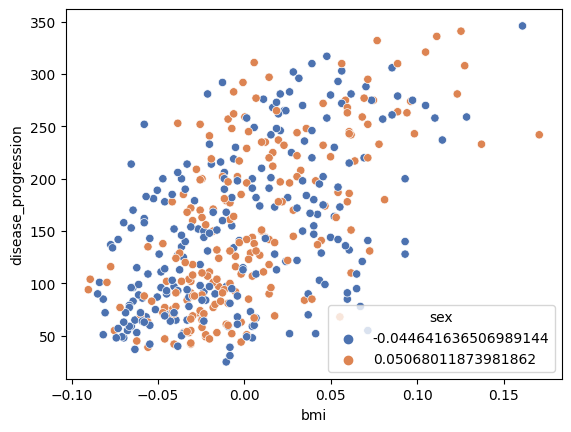

In [6]:
sns.scatterplot(data = diabetes, x = "bmi", y = "disease_progression", hue = "sex", palette= "deep")

In [7]:
X = np.array(diabetes["bmi"]).reshape(-1,1)  
y = np.array(diabetes["disease_progression"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

Text(0, 0.5, 'Disease Progression')

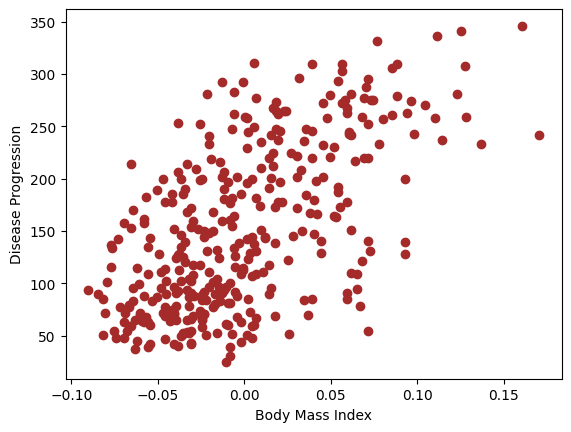

In [9]:
plt.scatter(X_train,y_train,color = 'brown',label = "Training_data")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')

Text(0, 0.5, 'Disease Progression')

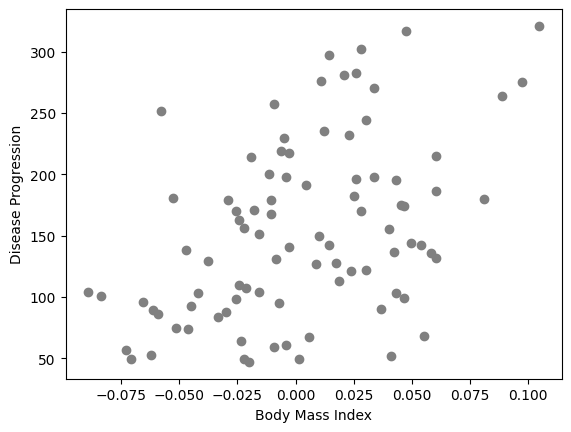

In [10]:
plt.scatter(X_test,y_test,color = "grey",label = "Test data")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')


In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
m = float(model.coef_)
c = model.intercept_
print("The slope of the model is m =",m)
print("The intercept of the mode is c=",c)

The slope of the model is m = 981.6554361411928
The intercept of the mode is c= 152.28824927379569


In [19]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
train_loss = np.mean((y_train - y_train_pred)**2)
test_loss = np.mean((y_test - y_test_pred)**2)
print("The loss on the train dataset is", train_loss)
print("The loss on the test dataset is", test_loss)

[255.17426905 211.79462571 161.0087018  129.26749936 196.98206457
 247.76798848 123.97729895 174.76322286 205.44638522 198.04010465
  95.41021675 198.04010465 115.5129783  107.04865765 239.30366783
 130.32553944  94.35217667 101.75845724  70.01725479 191.69186416
 180.05342327 163.12478196 128.20945928 209.67854555 206.5044253
 169.47302245 111.28081797 108.10669773 156.77654147 177.9373431
 149.3702609  100.70041716 141.96398033 140.90594025 146.19614066
 172.6471427  136.67377993 143.02202042 153.60242123 185.34362367
  88.00393618 141.96398033 145.13810058 148.31222082 182.16950343
  92.23609651 133.49965968 176.87930302 119.74513862 185.34362367
 130.32553944 105.99061756 170.53106253 144.0800605  194.86598441
 134.55769976 182.16950343 148.31222082 147.25418074 164.18282204
 192.74990424 175.82126294 201.2142249  131.38357952 211.79462571
 180.05342327  91.17805642 199.09814473 193.80794433  80.59765561
 127.15141919 127.15141919 122.91925887 188.51774392 157.83458156
 128.2094592

In [14]:
m = model.coef_
b = model.intercept_
print("Regression coefficients of the model are: ", m)
print("Regression Intercept is: ", b)

Regression coefficients of the model are:  [981.65543614]
Regression Intercept is:  152.28824927379569


In [15]:
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print("Train Loss: {:.2f}".format(train_loss))
print("Test Loss: {:.2f}".format(test_loss))

Train Loss: 3827.82
Test Loss: 4150.68


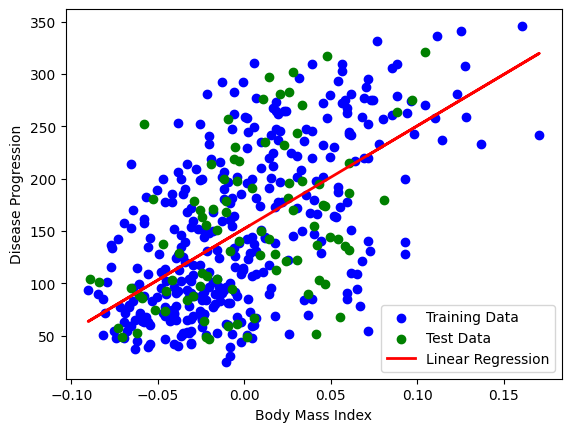

In [16]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

In [17]:
# The mean absolute error
print("Mean absolue error: %.2f" %metrics.mean_absolute_error(y_test, y_test_pred))

# Root Mean Square Error
print("RMSE of the model is: %.2f" %np.sqrt(test_loss))

# Accuracy of the model
print("R-Squared of the model: %.2f" %model.score(X,y))

Mean absolue error: 52.94
RMSE of the model is: 64.43
R-Squared of the model: 0.34
